# Multiple Linear Regression (MLR) on Advertising Dataset 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline 

df = pd.read_csv('datasets-for-isrl/Advertising.csv',index_col='sr_num')

In [2]:
df.head(2)

,TV,Radio,Newspaper,Sales
sr_num,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


Predictors

In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [5]:
df['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [6]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [7]:
df['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

Text(0,0.5,'Sales')

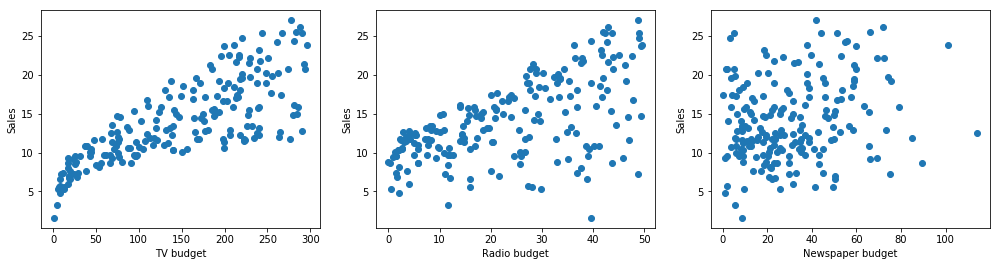

In [8]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
ax1.scatter(x=df['TV'],y=df['Sales'])
ax1.set_xlabel('TV budget')
ax1.set_ylabel('Sales')


ax2.scatter(x=df['Radio'],y=df['Sales'])
ax2.set_xlabel('Radio budget')
ax2.set_ylabel('Sales')

ax3.scatter(x=df['Newspaper'],y=df['Sales'])
ax3.set_xlabel('Newspaper budget')
ax3.set_ylabel('Sales')


# Training methods

## Calculate the coefficients using matrix calculations

In [90]:
def getCoefficientEstimates(data, predictorsColNames, responseColName, allowIntercept = True):
    
    if allowIntercept:
        data['intercept'] = 1
        predictorsColNames = ['intercept'] + predictorsColNames  
    XMatrix = np.asmatrix(data[predictorsColNames])    
    
    yMatrix = np.asmatrix(data[responseColName])
    
    XTransposeMatrix = np.transpose(XMatrix)
    
    XDotXTranspose = np.dot(XTransposeMatrix,XMatrix)
    XTransposeDotY = XTransposeMatrix * yMatrix.transpose()
    
    return np.dot(np.linalg.pinv(XDotXTranspose),XTransposeDotY)

In [91]:
getCoefficientEstimates(df, ['TV','Radio','Newspaper'], 'Sales',allowIntercept = True,)

matrix([[  2.93888937e+00],
        [  4.57646455e-02],
        [  1.88530017e-01],
        [ -1.03749304e-03]])

## Calculate the coefficients and fit model using sklearn

In [114]:
from sklearn import linear_model
def getCoefficientEstimatesUsingSklearn(data, predictorsColNames, responseColName, allowIntercept = True):
    lm = linear_model.LinearRegression(fit_intercept=allowIntercept)
    model = lm.fit(X=data[predictorsColNames],y=data[responseColName])
    return (lm.coef_, lm.intercept_)

In [93]:
getCoefficientEstimatesUsingSklearn(df, ['TV','Radio','Newspaper'], 'Sales',allowIntercept = True,)

(array([ 0.04576465,  0.18853002, -0.00103749]), 2.9388893694594067)

In [113]:
from sklearn import linear_model
def getModelParamsUsingSklean(data, predictorsColNames, responseColName, allowIntercept = True):
    lm = linear_model.LinearRegression(fit_intercept=allowIntercept)
    model = lm.fit(X=data[predictorsColNames],y=data[responseColName])
    return model.score(X=data[predictorsColNames], y=data[responseColName])

In [112]:
print('R2 : {0}'.format(getModelParamsUsingSklean(df, ['TV','Radio','Newspaper'], 'Sales',allowIntercept = True)))

R2 : 0.8972106381789521


## Calculate the coefficients and fit model using Statsmodel

In [115]:
import statsmodels.api as sm
def getModelParamsUsingStatsModel(data, predictorsColNames, responseColName):
    X = data[predictorsColNames] ## X usually means our input variables (or independent variables)
    y = data[responseColName] ## Y usually means our output/dependent variable
    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
    
    # Note the difference in argument order
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    
    print(model.summary())

/Users/siddharth/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [116]:
getModelParamsUsingStatsModel(df, ['TV','Radio','Newspaper'], 'Sales')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        13:30:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

The **R2** value using multiple regression on TV, Radio and Newspaper is much greater than using simple regression on TV(0.61) or Radio(0.33) or Newspaper(0.05)

**Which means TV, Radio and Newspaper together explains much more variability of Sales than just by doing the job alone**

## Interaction terms 

Let's Use TV and Radio interaction term

In [117]:
df['TV X Radio'] = df['TV'] * df['Radio']

In [119]:
getModelParamsUsingStatsModel(df, ['TV','Radio','TV X Radio','Newspaper'], 'Sales')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Fri, 27 Apr 2018   Prob (F-statistic):          2.92e-144
Time:                        13:35:56   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7284      0.253     26.561      0.0

**The R2 value using interaction of TV and Radio is increased to 0.968 from 0.897.** 

Please note we must keep the original terms as predictors too when using their interaction as predictor. This principle is called ** Hierarchical principle **
